In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
telecom_cust = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
telecom_cust.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
telecom_cust.shape

(7043, 21)

In [10]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [11]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Is there anything missing values in data

In [12]:
# Checking the data types of all columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Yukarıdaki çıktıya baktıktan sonra Total Charges için 11 eksik değer olduğunu söyleyebiliriz. Bu 11 satırı veri kümemizden çıkaralım.

In [14]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.drop(["customerID"], axis=1)
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

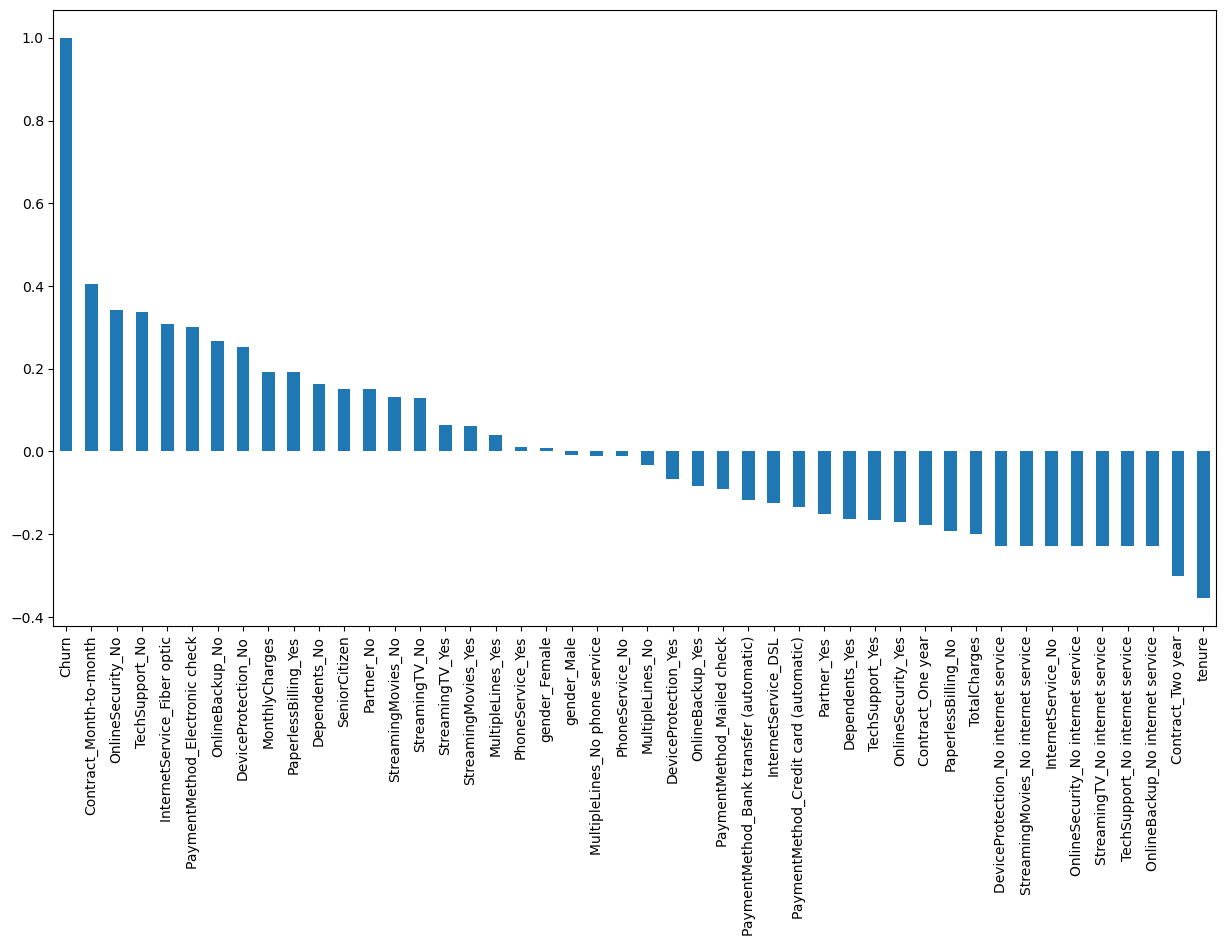

In [15]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Aylık sözleşmeler(Month to month contracts), çevrimiçi güvenlik(online security) ve teknik desteğin(tech support) olmaması, müşteri kaybıyla pozitif olarak ilişkili görünüyor. Bununla birlikte, kullanma süresi(tenure), iki yıllık sözleşmeler(two year contracts), müşteri kaybı ile negatif ilişkili görünmektedir.

<Axes: >

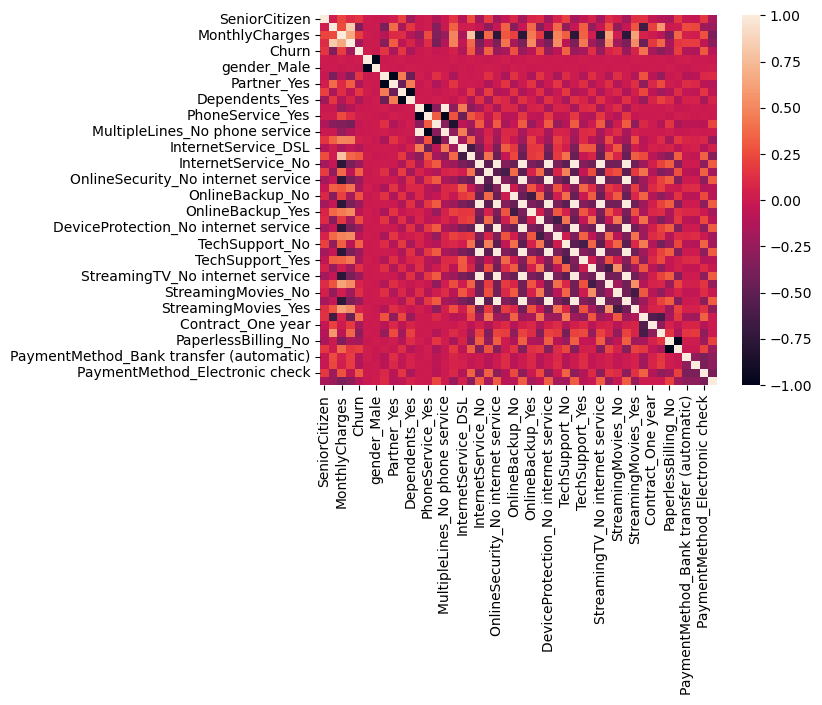

In [16]:
sns.heatmap(df_dummies.corr())

In [17]:
df_dummies.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [18]:
df_dummies.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

**Data Exploration**

**Gender Distribution**

Gender Female: 3483
Gender Male: 3549
Gender Female Percentage: 49.53
Gender Male Percentage: 50.47


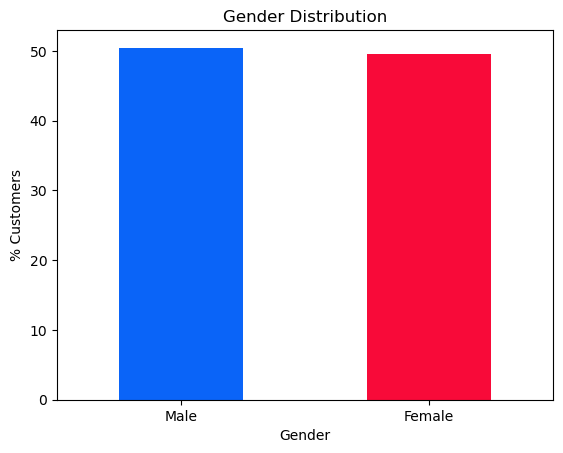

In [19]:
colors = ['#0A64F8','#F80A39']
gnd = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
gnd.set_ylabel('% Customers')
gnd.set_xlabel('Gender')
gnd.set_title('Gender Distribution')
gender_Female_count = df_dummies.gender_Female.sum()
gender_Male_count = df_dummies.gender_Male.sum()
gender_Female_perc = (gender_Female_count/ (gender_Male_count + gender_Female_count))*100
gender_Male_perc = (gender_Male_count/ (gender_Male_count + gender_Female_count))*100
print('Gender Female: %s' % gender_Female_count)
print('Gender Male: %s' % gender_Male_count)
print('Gender Female Percentage: '+ str(round(gender_Female_perc,2)))
print('Gender Male Percentage: '+ str(round(gender_Male_perc,2)))

plt.show()

Veri setimizdeki müşterilerin yaklaşık yarısı erkek, diğer yarısı kadındır.

**% Senior Citizens**

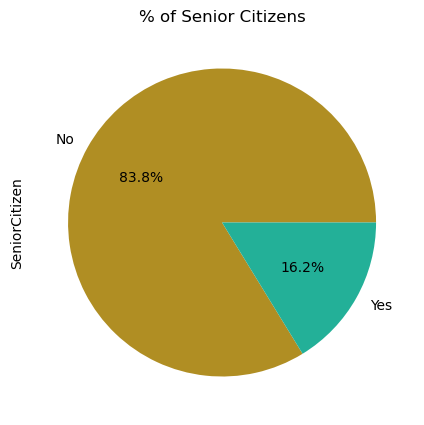

In [20]:
colorss = ['#B08E23','#23B098']
snr = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), colors=colorss)                                                                           
snr.set_title('% of Senior Citizens')
plt.show()

Müşterilerin sadece %16'sı yaşlıdır. Dolayısıyla verilerdeki müşterilerimizin çoğu genç insanlardır.

**Dependents Distribution**

No: 70.15073947667804
Yes: 29.84926052332196
No Percentage: 70.15
Yes Percentage: 29.85


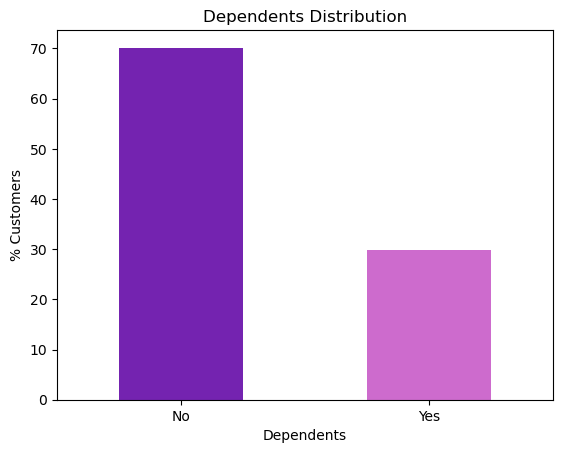

In [21]:
colors = ['#7423B0','#CD6BCD']
dpdnt = (telecom_cust['Dependents'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
dpdnt.set_ylabel('% Customers')
dpdnt.set_xlabel('Dependents')
dpdnt.set_title('Dependents Distribution')
dependents_no_count = df_dummies.Dependents_No.sum()
dependents_yes_count = df_dummies.Dependents_Yes.sum()
dependents_no_perc = (dependents_no_count/ (dependents_no_count + dependents_yes_count))*100
dependents_yes_perc = (dependents_yes_count/ (dependents_no_count + dependents_yes_count))*100
print('No: %s' % dependents_no_perc)
print('Yes: %s' % dependents_yes_perc)
print('No Percentage: '+ str(round(dependents_no_perc,2)))
print('Yes Percentage: '+ str(round(dependents_yes_perc,2)))

plt.show()

Toplam müşterilerin yalnızca %30'unun bakmakla yükümlü olduğu kişiler vardır.

**Partner Distribution**

No: 51.74914675767918
Yes: 48.250853242320815
No Percentage: 51.75
Yes Percentage: 48.25


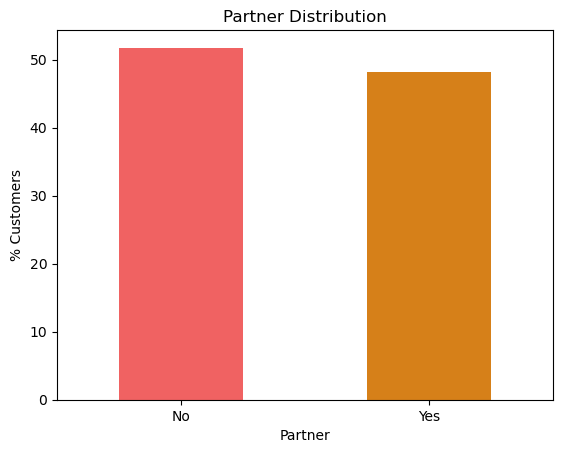

In [22]:
colors = ['#F06262','#D68019']
part = (telecom_cust['Partner'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
part.set_ylabel('% Customers')
part.set_xlabel('Partner')
part.set_title('Partner Distribution')
partner_no_count = df_dummies.Partner_No.sum()
partner_yes_count = df_dummies.Partner_Yes.sum()
partner_no_perc = (partner_no_count/ (partner_no_count + partner_yes_count))*100
partner_yes_perc = (partner_yes_count/ (partner_no_count + partner_yes_count))*100
print('No: %s' % partner_no_perc)
print('Yes: %s' % partner_yes_perc)
print('No Percentage: '+ str(round(partner_no_perc,2)))
print('Yes Percentage: '+ str(round(partner_yes_perc,2)))

plt.show()

Müşterilerin yaklaşık %50'sinin bir eşi vardır.

**Tenure**

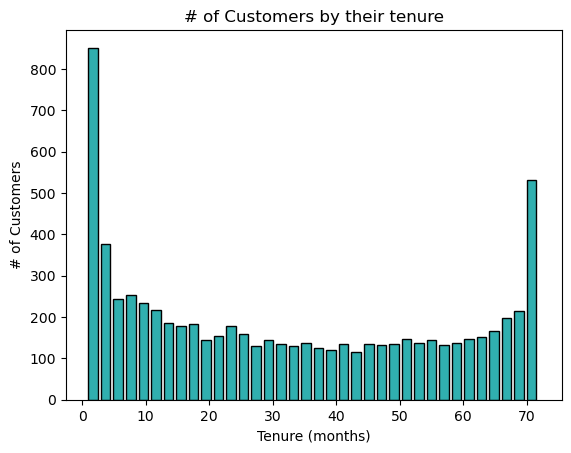

In [23]:
plt.hist(telecom_cust['tenure'], width=1.5, bins=36, color="#30AFAF", edgecolor="black")
plt.ylabel('# of Customers')
plt.xlabel('Tenure (months)')
plt.title('# of Customers by their tenure')
plt.show()

Yukarıdaki histograma bakılırsa, pek çok müşterinin telekom şirketinde yalnızca bir ay kaldığı, pek çoğunun ise yaklaşık 72 aydır orada olduğunu görebiliriz.

**Contracts**

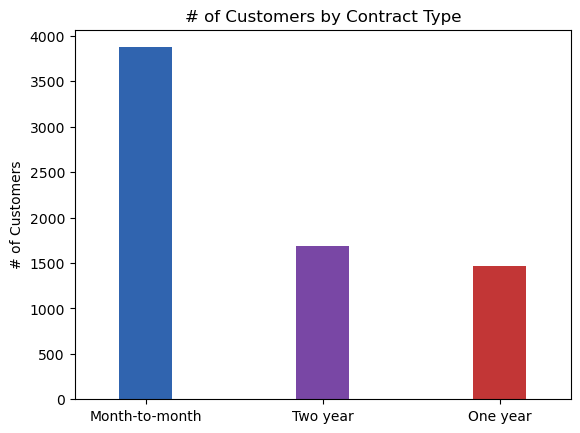

In [24]:
color=["#3064AF", "#7947A5", "#C23636"]
cont = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=color)
cont.set_ylabel('# of Customers')
cont.set_title('# of Customers by Contract Type')
plt.show()

Bu grafikte de görebileceğimiz gibi, müşterilerin çoğu month-to-month (1 yıldan az)'dır.

**tenure of customers**

/tmp/ipykernel_32/2962217497.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
/tmp/ipykernel_32/2962217497.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['ten

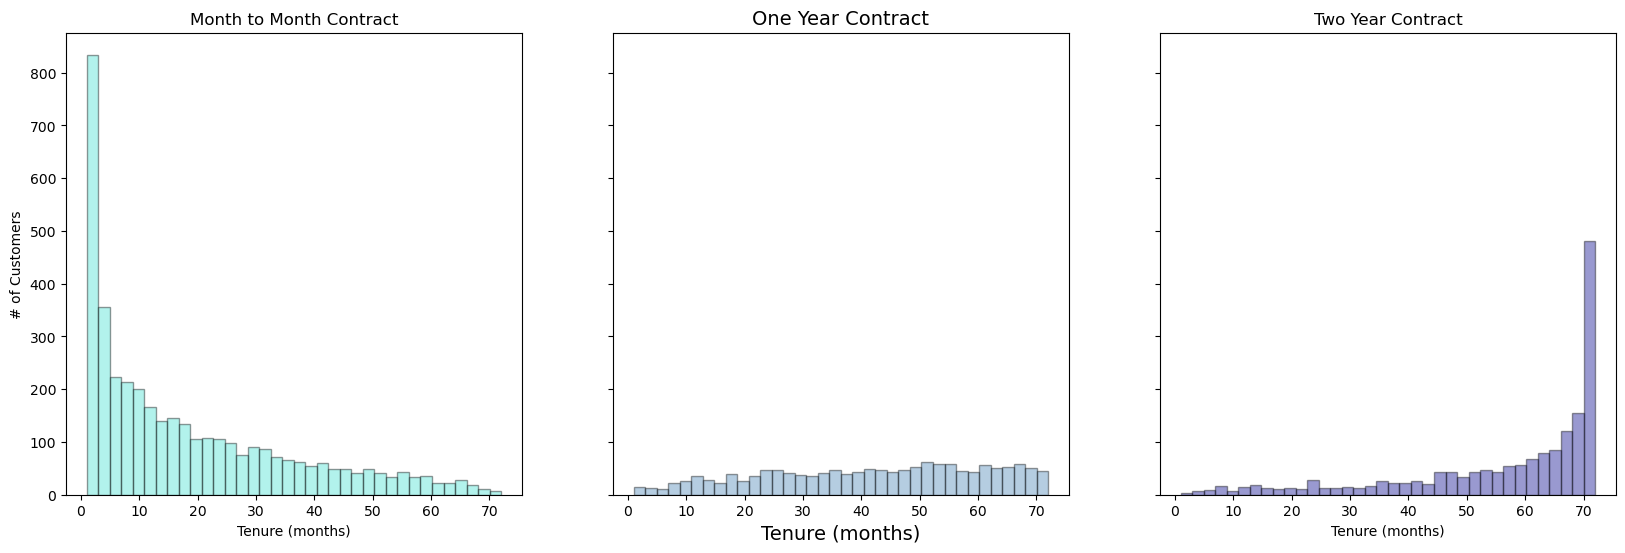

In [42]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')
plt.show()

**Churn Rate**

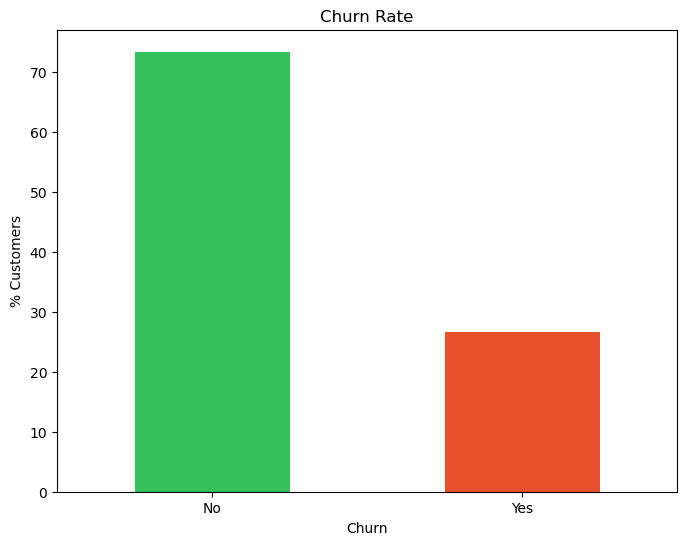

In [26]:
colors = ['#36C25A','#E4512B']
chu_rate = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
chu_rate.set_ylabel('% Customers')
chu_rate.set_xlabel('Churn')
chu_rate.set_title('Churn Rate')
plt.show()

Veri incelendiğinde, müşterilerin %74'ünün aboneliğini bırakmadığı görülmektedir.

**Churn by Contract Type**

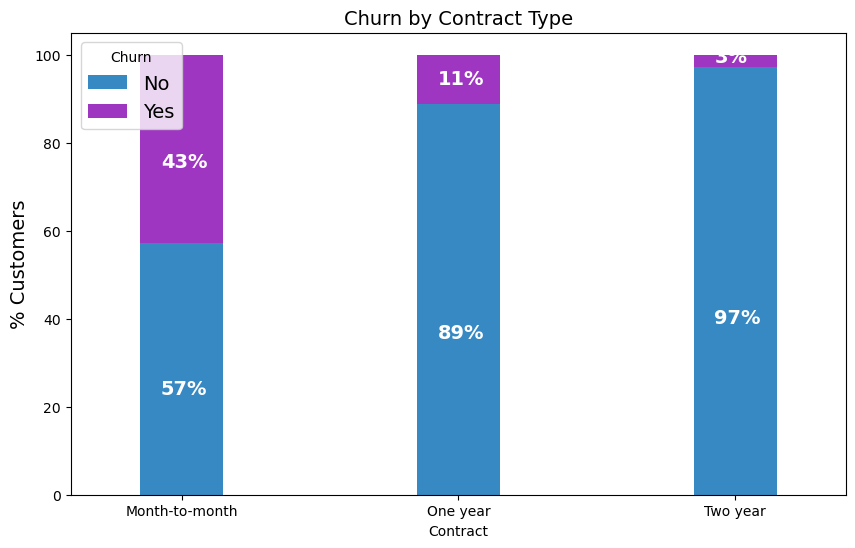

In [27]:
colors = ['#3689C2','#9E36C2']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

cont_chu = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
cont_chu.legend(loc='best',prop={'size':14},title = 'Churn')
cont_chu.set_ylabel('% Customers',size = 14)
cont_chu.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in cont_chu.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    cont_chu.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Korelasyon grafiğinde gördüğümüze benzer şekilde, month-to-month olan müşterilerin müşteri kaybı oranı çok daha yüksektir.

**Churn by Seniority**

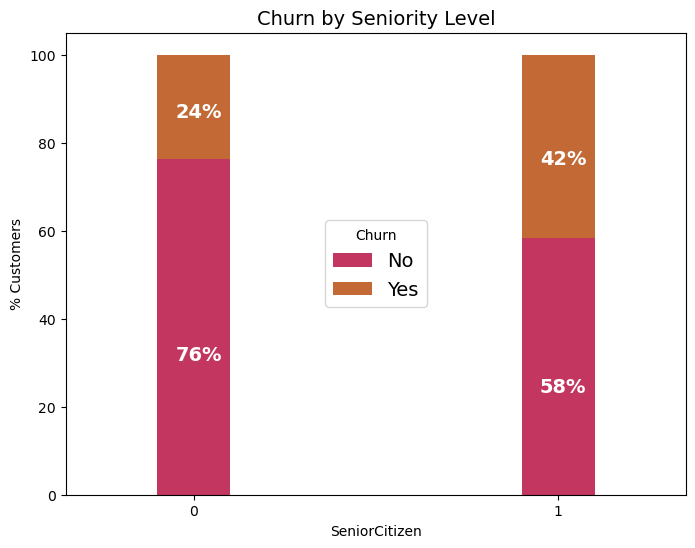

In [28]:
colors = ['#C23660','#C26936']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

sen_chu = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
sen_chu.legend(loc='center',prop={'size':14},title = 'Churn')
sen_chu.set_ylabel('% Customers')
sen_chu.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in sen_chu.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    sen_chu.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Yaşlı vatandaşların, genç vatandaşlara göre kayıp oranı daha fazla olduğu görülmektedir.

**Linear Regression Model**

In [29]:
features = df_dummies.drop("Churn", axis = 1)
target = df_dummies["Churn"]

In [30]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)


In [31]:
from sklearn.linear_model import LinearRegression

lin_reg_mod = LinearRegression().fit(X_train, y_train)
y_predict_lin_mod = lin_reg_mod.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
rmse_lin_reg_mod = np.sqrt(mean_squared_error(y_test, y_predict_lin_mod, squared = False))
rmse_lin_reg_mod

0.6111378943644239

**Decision Tree**

In [33]:
features = df_dummies.drop("Churn", axis = 1)
target = df_dummies["Churn"]

In [34]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 4)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [36]:
dt_model = DecisionTreeClassifier(random_state = 4)
decision_tree = dt_model.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
rmse_dt_mod = mean_squared_error(y_test, y_pred_dt, squared = False)
rmse_dt_mod

0.5264840938395937

**Logistic Regression Model**

In [38]:
features = df_dummies.drop("Churn", axis = 1)
target = df_dummies["Churn"]

In [39]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=101)

In [40]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg_mod = LogisticRegression().fit(X_train, y_train)
y_predict_log_mod = log_reg_mod.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import mean_squared_error
rmse_log_mod = mean_squared_error(y_test, y_predict_log_mod, squared = False)
rmse_log_mod

0.43724926818715903

Bildiğimiz gibi mean squared error değeri küçüldükçe modelin doğruluğu artar. Bu bağlamda yukarıda incelediğimiz Linear Regression Model, Decision Tree ve Logistic Regression Model'leri arasında doğruluk değeri en düşük olan model Logistic Regression Model'dir.
    - Linear Regression Model accuracy : 0.61
    - Decision Tree accuracy : 0.53
    - Logistic Regression Model accuracy : 0.44